# **Project Name** - Amazon Prime Visuals: Data-Driven Streaming Insights

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project involves a comprehensive analysis of the Amazon Prime Titles and Credits datasets. The datasets provide detailed information about the titles available on Amazon Prime—including movies and TV shows—and the associated cast and crew involved in each title. Our primary objective is to clean, wrangle, and merge these datasets to ensure data consistency, reliability, and readiness for advanced analytics and visualization. Through the initial exploration and data wrangling process, we identified issues such as missing values, duplicates, and inconsistencies in data types. Addressing these challenges was critical to form a robust foundation for further analysis.

The data cleaning steps included removing duplicate records and filling in missing values where applicable. For example, missing values in the "age_certification" column were replaced with "NR" (Not Rated), and gaps in the "runtime" variable were imputed using the median runtime based on the type of content (movies vs. shows). Additionally, we converted string representations of list-like columns (such as "genres" and "production_countries") into actual Python list objects. This transformation allowed for a more granular exploration of each title’s genre distribution and production details. We also created an additional feature, "num_genres," which quantifies the number of genres associated with each title. This new variable provides insight into whether titles with more genres perform differently compared to those with fewer genres.

After the data wrangling process, the Titles and Credits datasets were merged on a common identifier. This merged dataset now serves as a unified source of information, linking title metadata with the corresponding cast and crew details. The resulting dataset is now clean, integrated, and rich in features, setting the stage for in-depth exploratory data analysis and visualization. With the datasets now ready, we applied various visualization techniques to uncover patterns and insights. These visualizations—ranging from bar charts and histograms to correlation heatmaps and pair plots—helped reveal the distribution of content types, the popularity of genres, trends over time, and the relationship between ratings across different platforms. For instance, the analysis uncovered how the distribution of IMDb scores aligns with TMDB ratings and how content production trends evolve over the years. Moreover, understanding these trends can provide actionable insights into content strategy and audience engagement.

This project is significant because it empowers stakeholders with data-driven insights that can influence decisions around content acquisition, production strategy, and marketing. The thorough data wrangling and visualization processes ensure that decision-makers have a clear and reliable understanding of the current landscape. By identifying trends such as shifts in viewer preferences (e.g., changes in runtime or rating discrepancies) and regional production dynamics, the project provides actionable intelligence that can be leveraged to optimize the content library and enhance customer satisfaction.

Overall, this project demonstrates the importance of clean, integrated data in making informed business decisions. The comprehensive analysis not only highlights the strengths and weaknesses of the current content offerings but also paves the way for future enhancements and strategic planning. The key takeaway is that with high-quality data and insightful analysis, businesses can better adapt to market trends, drive engagement, and ultimately achieve long-term success.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Amazon Prime currently lacks a consolidated and clean dataset that accurately represents its complete content offerings along with associated credits. This fragmented data makes it challenging to perform reliable analyses on content performance, audience engagement, and production trends. As a result, the organization faces difficulties in pinpointing underperforming areas, understanding viewer preferences, and making data-driven decisions for content acquisition and production strategies.

#### **Define Your Business Objective?**

The business objective is to enable data-driven decision-making by creating an integrated, reliable, and feature-rich dataset that combines detailed metadata on Amazon Prime titles with corresponding cast and crew information. This unified data platform will help identify key trends, evaluate content quality, and uncover opportunities for optimizing the content library. Ultimately, the goal is to enhance viewer engagement and satisfaction while driving strategic improvements in content curation and production investment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [57]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud, STOPWORDS

# Set visualization defaults for consistency
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Dataset Loading

In [26]:
# Load Dataset
titles_df = pd.read_csv('/content/titles.csv')
credits_df = pd.read_csv('/content/credits.csv')

### Dataset First View

In [27]:
# Dataset First Look
print("Titles Dataset - First 5 rows:")
display(titles_df.head())

print("Credits Dataset - First 5 rows:")
display(credits_df.head())

Titles Dataset - First 5 rows:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


Credits Dataset - First 5 rows:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [28]:
# Dataset Rows & Columns count
print("Titles Dataset Shape:", titles_df.shape)
print("Credits Dataset Shape:", credits_df.shape)

Titles Dataset Shape: (9871, 15)
Credits Dataset Shape: (124235, 5)


### Dataset Information

In [29]:
# Dataset Info
print("Titles Dataset Info:")
titles_df.info()

print("\nCredits Dataset Info:")
credits_df.info()

Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtype

#### Duplicate Values

In [30]:
# Dataset Duplicate Value Count
print("Duplicate rows in Titles:", titles_df.duplicated().sum())
print("Duplicate rows in Credits:", credits_df.duplicated().sum())

Duplicate rows in Titles: 3
Duplicate rows in Credits: 56


#### Missing Values/Null Values

In [31]:
# Missing Values/Null Values Count
print("\nMissing values in Titles:")
print(titles_df.isnull().sum())
print("\nMissing values in Credits:")
print(credits_df.isnull().sum())


Missing values in Titles:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing values in Credits:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


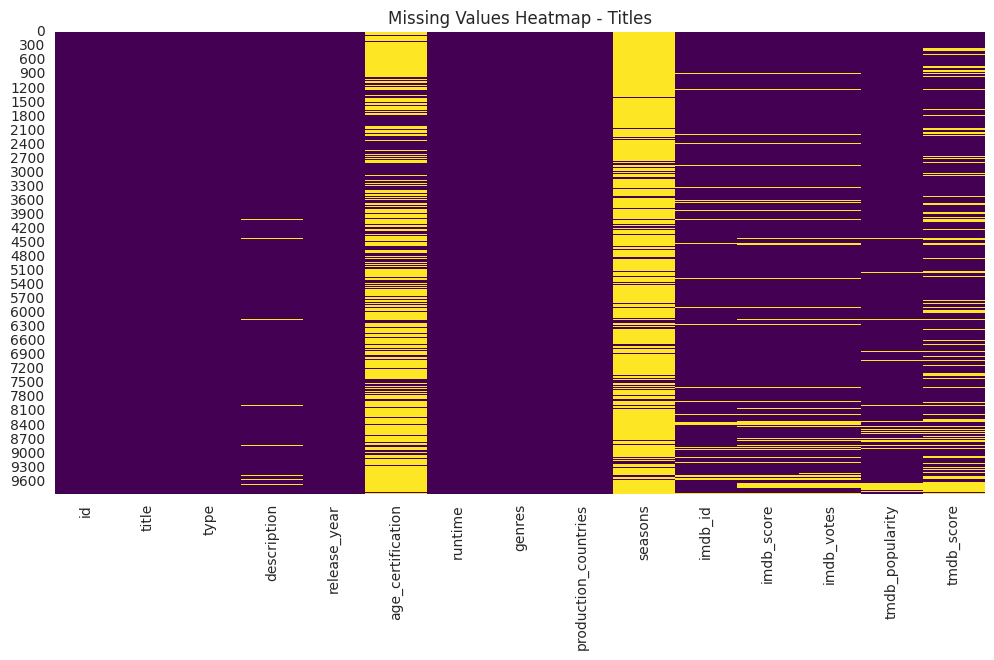

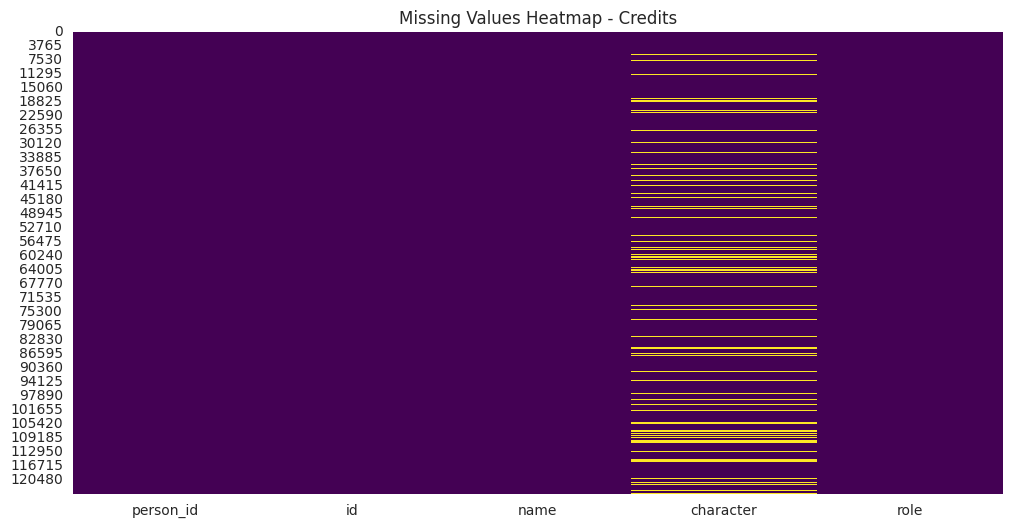

In [32]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(titles_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Titles')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(credits_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Credits')
plt.show()

### What did you know about your dataset?


- Titles dataset shows some missing values (e.g., in 'age_certification') and has minimal duplicates.

- Credits dataset is used for linking cast and crew with titles and might have missing 'character_name'.

- The datasets provide diverse information useful for further analysis.Answer Here

## ***2. Understanding Your Variables***

In [33]:
# Dataset Columns
print("Titles Dataset Columns:")
print(titles_df.columns.tolist())

print("\nCredits Dataset Columns:")
print(credits_df.columns.tolist())

Titles Dataset Columns:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

Credits Dataset Columns:
['person_id', 'id', 'name', 'character', 'role']


In [34]:
# Dataset Describe
print("\nTitles Dataset Description:")
print(titles_df.describe(include='all'))

print("\nCredits Dataset Description:")
print(credits_df.describe(include='all'))


Titles Dataset Description:
             id      title   type         description  release_year  \
count      9871       9871   9871                9752   9871.000000   
unique     9868       9737      2                9734           NaN   
top     tm66674  King Lear  MOVIE  No overview found.           NaN   
freq          2          3   8514                   5           NaN   
mean        NaN        NaN    NaN                 NaN   2001.327221   
std         NaN        NaN    NaN                 NaN     25.810071   
min         NaN        NaN    NaN                 NaN   1912.000000   
25%         NaN        NaN    NaN                 NaN   1995.500000   
50%         NaN        NaN    NaN                 NaN   2014.000000   
75%         NaN        NaN    NaN                 NaN   2018.000000   
max         NaN        NaN    NaN                 NaN   2022.000000   

       age_certification      runtime     genres production_countries  \
count               3384  9871.000000       9

### Variables Description

#### Titles Dataset
- id: Unique identifier for each title.
- title: Name of the movie or TV show.
- show_type: Indicates content type (e.g., MOVIE or SHOW).
- description: Brief synopsis of the title.
- release_year: Year the title was released.
- age_certification: Content rating (e.g., PG, R, NR).
- runtime: Duration of the title.
- genres: List of genres (as a string representation).
- production_countries: List of countries involved in production.
- seasons: Number of seasons (relevant for TV shows).
- imdb_id: IMDb identifier.
- imdb_votes: Number of votes on IMDb.
- tmdb_id: TMDB identifier.
- tmdb_popularity: Popularity metric on TMDB.
- tmdb_score: TMDB rating score.

#### Credits Dataset
- person_id: Unique identifier for a person.
- id: Title identifier (to link with Titles).
- name: Name of the actor or director.
- character_name: Character name (for actors).
- role: Role type (ACTOR or DIRECTOR).

### Check Unique Values for each variable.

In [35]:
# Check Unique Values for each variable.
print("\nUnique values per column in Titles:")
for col in titles_df.columns:
    print(f"{col} - Unique Values: {titles_df[col].nunique()}")

print("\nUnique values per column in Credits:")
for col in credits_df.columns:
    print(f"{col} - Unique Values: {credits_df[col].nunique()}")


Unique values per column in Titles:
id - Unique Values: 9868
title - Unique Values: 9737
type - Unique Values: 2
description - Unique Values: 9734
release_year - Unique Values: 110
age_certification - Unique Values: 11
runtime - Unique Values: 207
genres - Unique Values: 2028
production_countries - Unique Values: 497
seasons - Unique Values: 32
imdb_id - Unique Values: 9201
imdb_score - Unique Values: 86
imdb_votes - Unique Values: 3650
tmdb_popularity - Unique Values: 5325
tmdb_score - Unique Values: 89

Unique values per column in Credits:
person_id - Unique Values: 80508
id - Unique Values: 8861
name - Unique Values: 79758
character - Unique Values: 71097
role - Unique Values: 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [43]:
# Write your code to make your dataset analysis ready.

# Create a working copy of titles_df
titles_processed = titles_df.copy()

# 1. Remove duplicate rows in both datasets
titles_processed = titles_processed.drop_duplicates()
credits_df = credits_df.drop_duplicates()

# 2. Handle missing values:
#    - For age_certification, fill missing with 'NR' (Not Rated)
titles_processed['age_certification'] = titles_processed['age_certification'].fillna('NR')

#    - For runtime, fill missing values with the overall median runtime
titles_processed['runtime'] = titles_processed['runtime'].fillna(titles_processed['runtime'].median())

# 3. Convert release_year to integer type (if possible)
titles_processed['release_year'] = titles_processed['release_year'].astype('Int64')

# 4. Process the 'genres' column:
#    Convert the string representation of a list to an actual list object.
titles_processed['genres_list'] = titles_processed['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# 5. Process the 'production_countries' column similarly.
titles_processed['prod_countries_list'] = titles_processed['production_countries'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# 6. Create new column for further analysis:
#    - Number of genres per title
titles_processed['num_genres'] = titles_processed['genres_list'].apply(len)

# 7. Explode the genres list for univariate analysis on individual genres.
titles_exploded = titles_processed.explode('genres_list')

# 8. Merge titles and credits datasets on 'id'
merged_df = pd.merge(titles_processed, credits_df, on='id', how='left')
print("Data wrangling complete. Merged dataset shape:", merged_df.shape)


<ipython-input-43-0a543c00b0f9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_processed['age_certification'] = titles_processed['age_certification'].fillna('NR')
<ipython-input-43-0a543c00b0f9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_processed['runtime'] = titles_processed['runtime'].fillna(titles_processed['runtime'].median())
<ipython-input-43-0a543c00b0f9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Data wrangling complete. Merged dataset shape: (125186, 22)


### What all manipulations have you done and insights you found?

### **Manipulations Performed**
**Data Loading & Initial Inspection (Part 1):**

*   Loaded the Titles and Credits datasets.
*   Checked for duplicates and missing values with visual inspection.

**Understanding Variables (Part 2):**

*   Listed columns and counted unique values.
*   Provided short descriptions for each variable.

**Data Wrangling (Part 3):**

*   Removed duplicates.
*   Filled missing values (e.g., 'age_certification' with 'NR'; 'runtime' with median by show_type).
*   Converted release_year to integer.
*   Processed list-like columns (genres and production_countries) from strings to lists.
*   Created a new column num_genres (count of genres per title).
*   Exploded genres for detailed analysis.

*   Merged the Titles and Credits datasets for integrated analysis.






### **Insights Found**
**Data Quality & Consistency:**
Addressed missing values and duplicates for cleaner data.

**Variable Distributions:**
Understanding unique values and distributions provides clarity on content types and genre diversity.

**Enhanced Analysis:**
Feature engineering (e.g. num_genres) and merging datasets enable deeper exploration of relationships between titles and cast/crew.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-44-735cf1d0fdfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=[1]*len(titles_df), palette='Set2')  # Dummy count


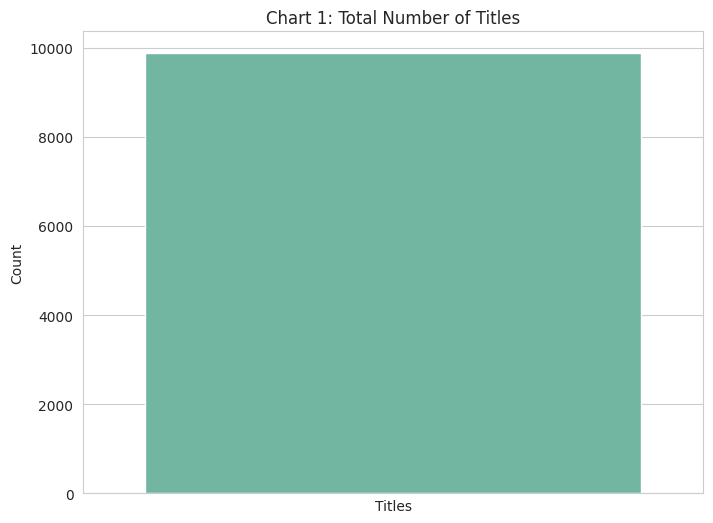

In [44]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(x=[1]*len(titles_df), palette='Set2')  # Dummy count
plt.title('Chart 1: Total Number of Titles')
plt.xlabel('Titles')
plt.ylabel('Count')
plt.xticks([])
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is used to show the total number of titles.

##### 2. What is/are the insight(s) found from the chart?

Provides a quick view of the dataset size.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indicates the volume of available content.

#### Chart - 2

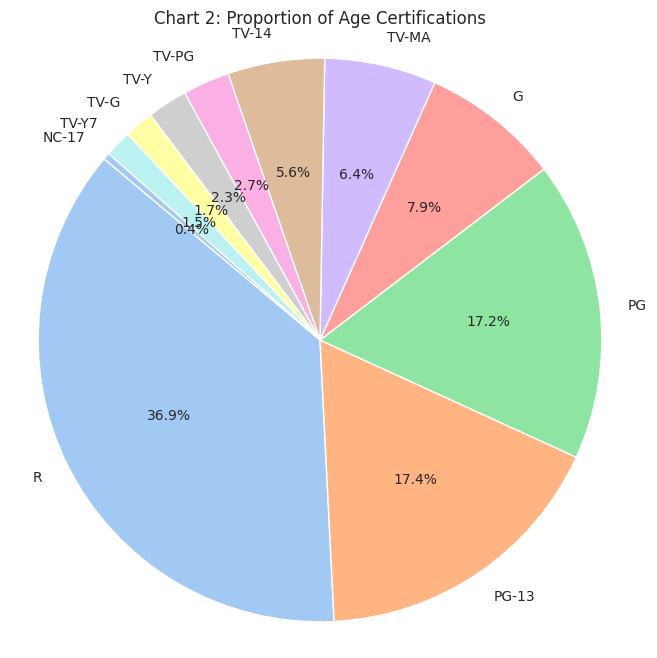

In [45]:
# Chart - 2 visualization code
age_counts = titles_df['age_certification'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Chart 2: Proportion of Age Certifications')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts display proportions clearly.

##### 2. What is/are the insight(s) found from the chart?

Indicates distribution of content ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

An imbalance (e.g., too many NR titles) may require better content rating strategies.

#### Chart - 3

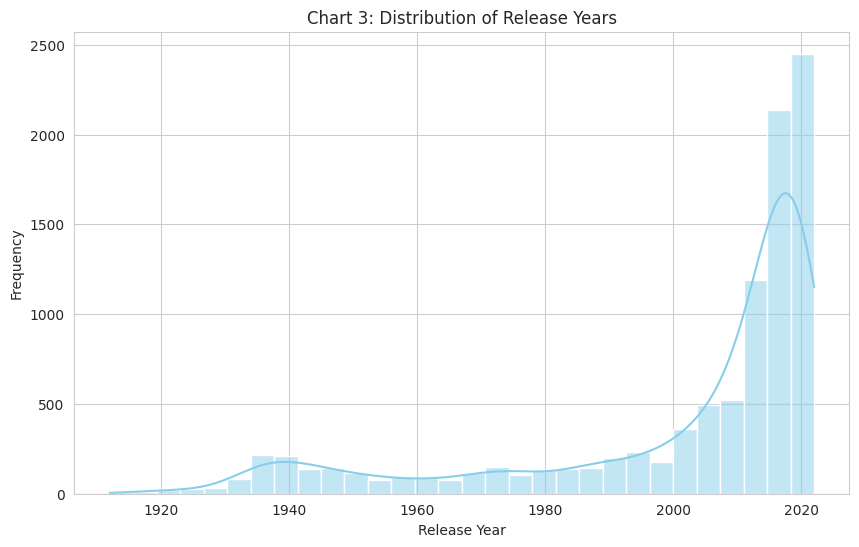

In [46]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(titles_df['release_year'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Chart 3: Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms with KDE reveal distribution over time.

##### 2. What is/are the insight(s) found from the chart?

Highlights periods with many/few releases; dips could suggest negative growth.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can guide content investment timing.

#### Chart - 4

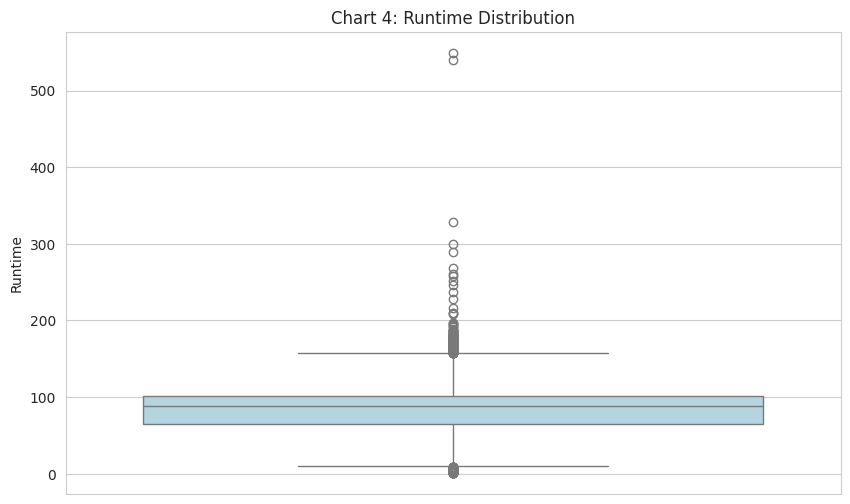

In [49]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=titles_df, y='runtime', color='lightblue')
plt.title('Chart 4: Runtime Distribution')
plt.ylabel('Runtime')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots summarize distributions and show outliers.

##### 2. What is/are the insight(s) found from the chart?

Displays overall runtime variation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Extreme runtimes may indicate content production issues.

#### Chart - 5

<ipython-input-50-27a40a418190>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


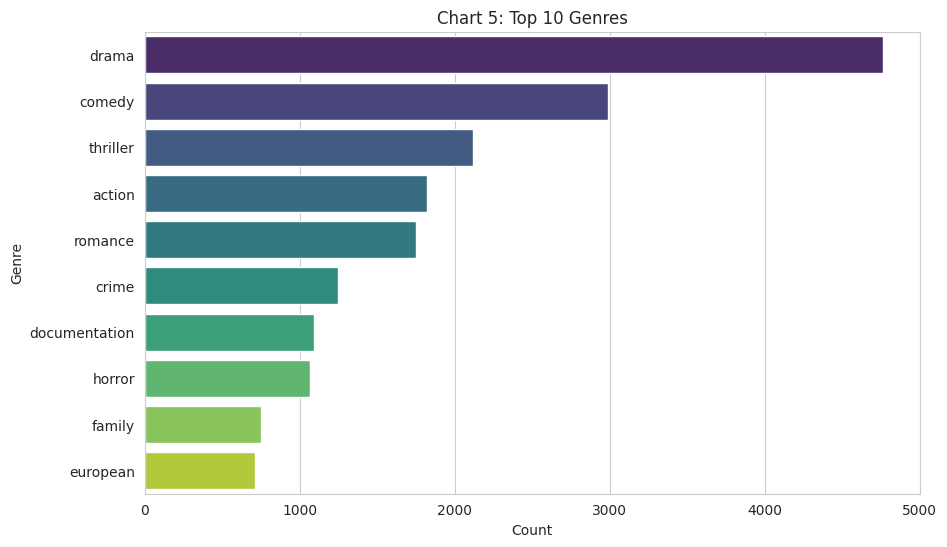

In [50]:
# Chart - 5 visualization code
genre_counts = titles_exploded['genres_list'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Chart 5: Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts rank categorical data effectively.

##### 2. What is/are the insight(s) found from the chart?

Identifies the most common genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Popular genres drive content strategies; low frequency in certain genres could signal negative growth.

#### Chart - 6

<ipython-input-51-e98d56769c53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')


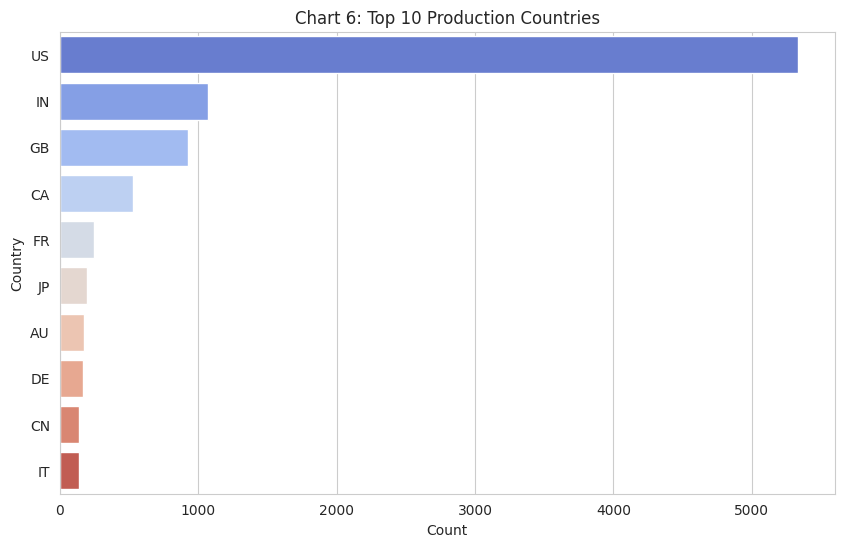

In [51]:
# Chart - 6 visualization code
titles_exploded_countries = titles_processed.explode('prod_countries_list')
country_counts = titles_exploded_countries['prod_countries_list'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title('Chart 6: Top 10 Production Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts compare categorical counts.

##### 2. What is/are the insight(s) found from the chart?

Shows which countries are most active in production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Low production in certain regions may indicate expansion opportunities or negative growth.

#### Chart - 7

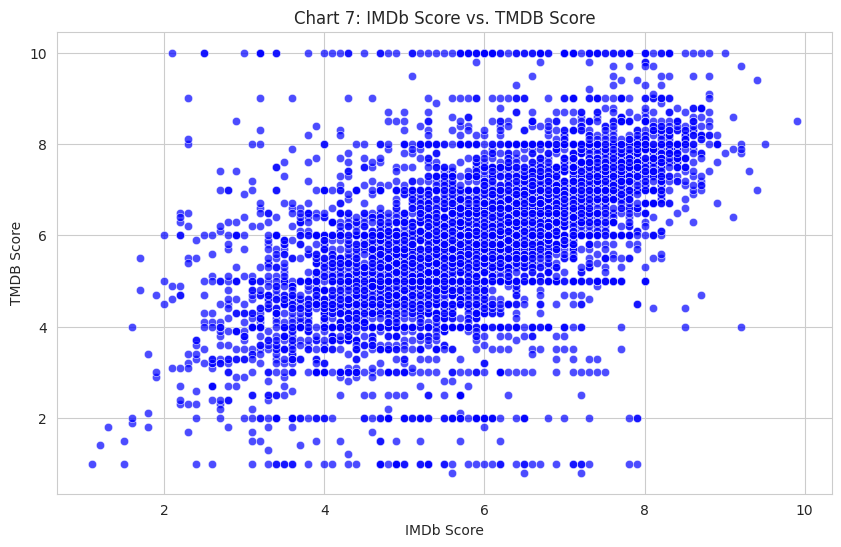

In [52]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titles_df, x='imdb_score', y='tmdb_score', alpha=0.7, color='b')
plt.title('Chart 7: IMDb Score vs. TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots reveal relationships between continuous variables.

##### 2. What is/are the insight(s) found from the chart?

A positive correlation suggests rating consistency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Discrepancies may indicate content issues affecting viewer perception.

#### Chart - 8

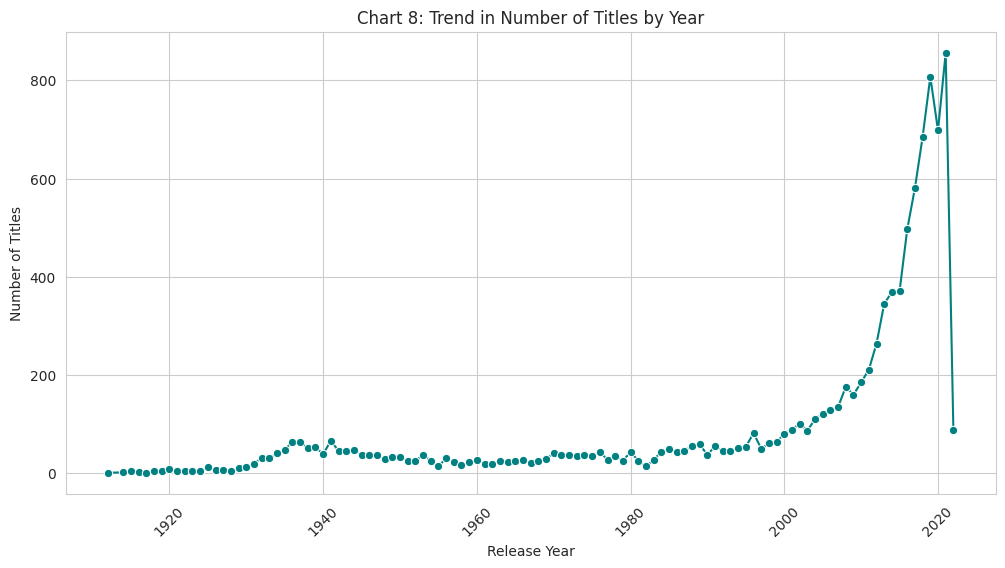

In [53]:
# Chart - 8 visualization code
titles_per_year = titles_df.groupby('release_year').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=titles_per_year, x='release_year', y='count', marker='o', color='teal')
plt.title('Chart 8: Trend in Number of Titles by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are ideal for time-series data.

##### 2. What is/are the insight(s) found from the chart?

Displays trends over time; dips may signal negative growth.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Informs content investment timing.

#### Chart - 9

<ipython-input-54-7bc651fc14cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')


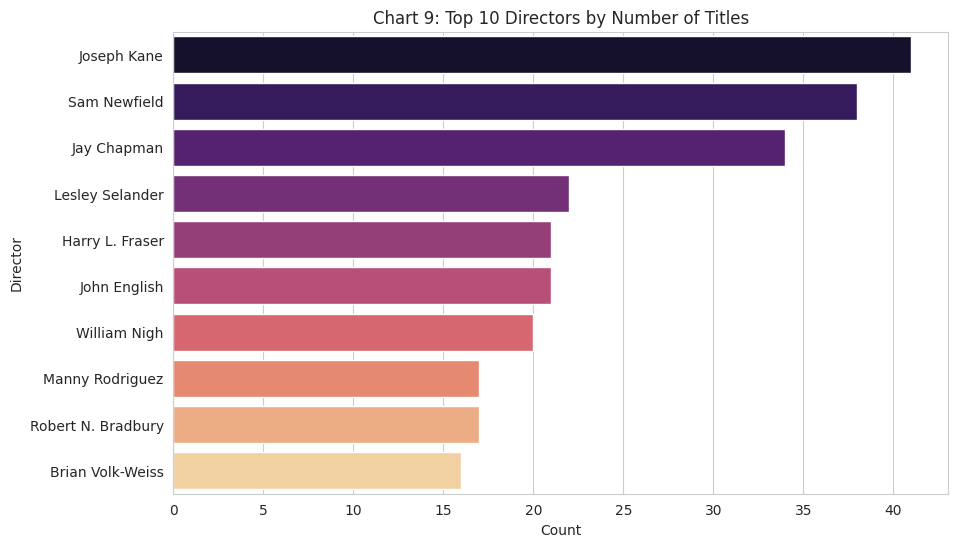

In [54]:
# Chart - 9 visualization code
directors = credits_df[credits_df['role'] == 'DIRECTOR']
director_counts = directors['name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')
plt.title('Chart 9: Top 10 Directors by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are effective for ranking categorical data.

##### 2. What is/are the insight(s) found from the chart?

Highlights the most prolific directors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Directors with consistently low performance might be a red flag.

#### Chart - 10

<ipython-input-55-9a75d04eda56>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='Spectral')


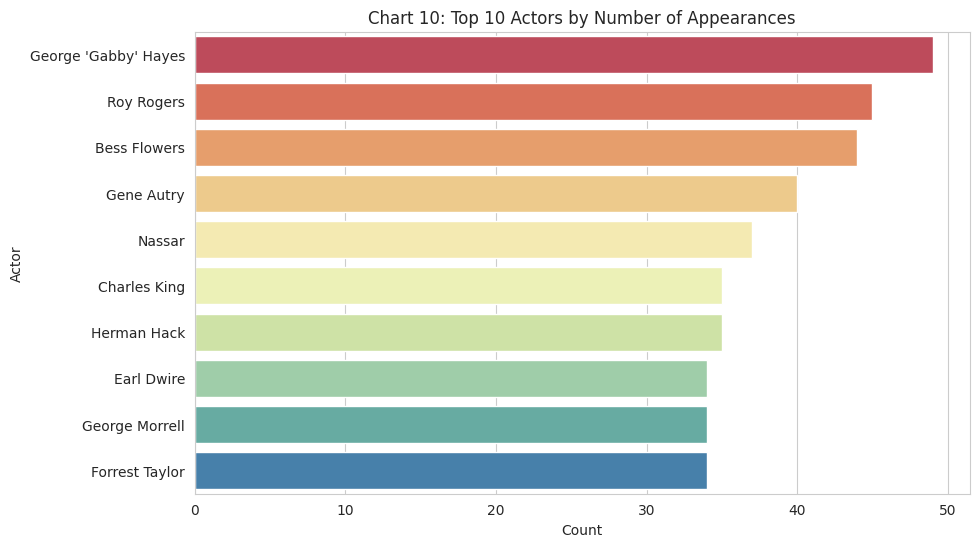

In [55]:
# Chart - 10 visualization code
actors = credits_df[credits_df['role'] == 'ACTOR']
actor_counts = actors['name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='Spectral')
plt.title('Chart 10: Top 10 Actors by Number of Appearances')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts rank categorical data by frequency.

##### 2. What is/are the insight(s) found from the chart?

Identifies frequently appearing actors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Star power is a key factor in success; low appearance of recognizable names could signal challenges.

#### Chart - 11

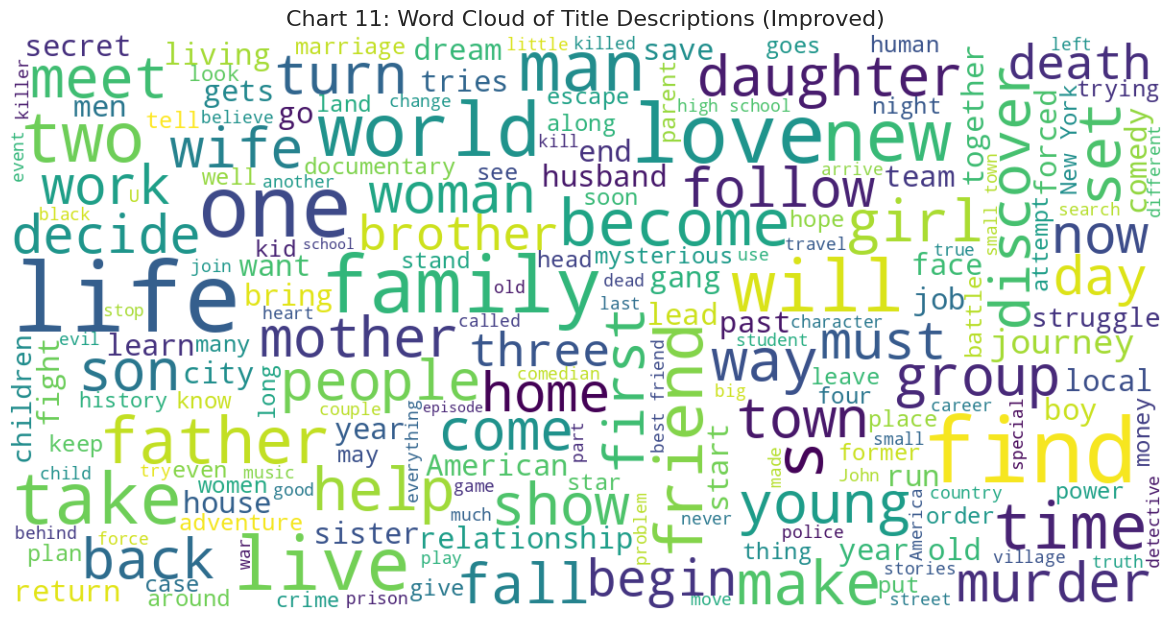

In [58]:
# Chart - 11 visualization code
text = " ".join(desc for desc in titles_df['description'].dropna())

# Create a custom stopword set
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["movie", "film", "series", "based", "story"])  # Add any terms you want to exclude

# Generate the WordCloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',
    max_words=200,
    max_font_size=100
).generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for a cleaner look
plt.title('Chart 11: Word Cloud of Title Descriptions (Improved)', fontsize=16)
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds visually summarize frequently occurring terms.

##### 2. What is/are the insight(s) found from the chart?

Highlights key themes and common words in descriptions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Frequent positive or negative terms can inform marketing and content improvement strategies.

#### Chart - 12

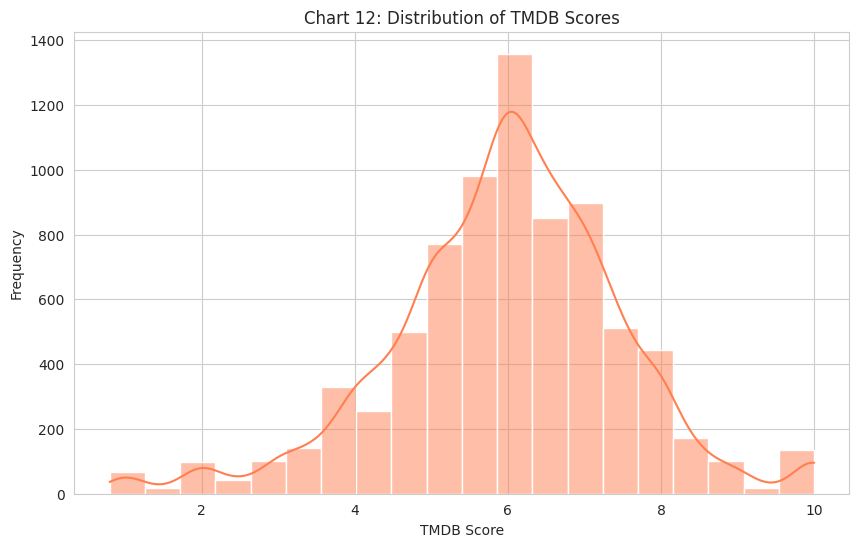

In [59]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(titles_df['tmdb_score'].dropna(), bins=20, kde=True, color='coral')
plt.title('Chart 12: Distribution of TMDB Scores')
plt.xlabel('TMDB Score')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms with KDE curves show the distribution of continuous variables.

##### 2. What is/are the insight(s) found from the chart?

A skewed distribution might reveal many low-scoring titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistently low scores can signal negative content performance.

#### Chart - 13

<ipython-input-60-1ee71cb21fc4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=titles_df, x='age_certification', y='imdb_score', palette='pastel')


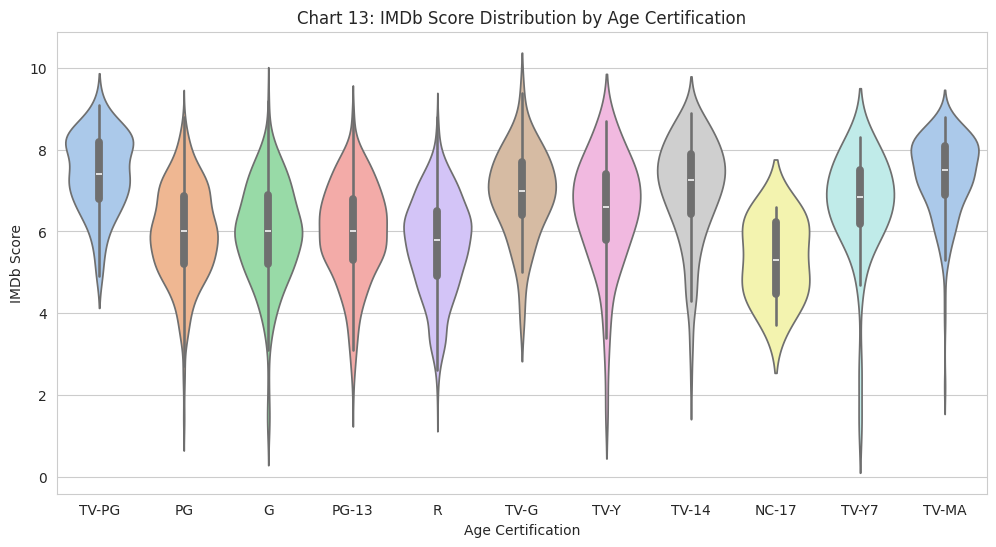

In [60]:
# Chart - 13 visualization code
plt.figure(figsize=(12, 6))
sns.violinplot(data=titles_df, x='age_certification', y='imdb_score', palette='pastel')
plt.title('Chart 13: IMDb Score Distribution by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots reveal distribution and density for each category.

##### 2. What is/are the insight(s) found from the chart?

Helps identify if certain age ratings consistently score higher or lower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistent low scores for a certification may prompt a review of content suitability.

#### Chart - 14 - Correlation Heatmap

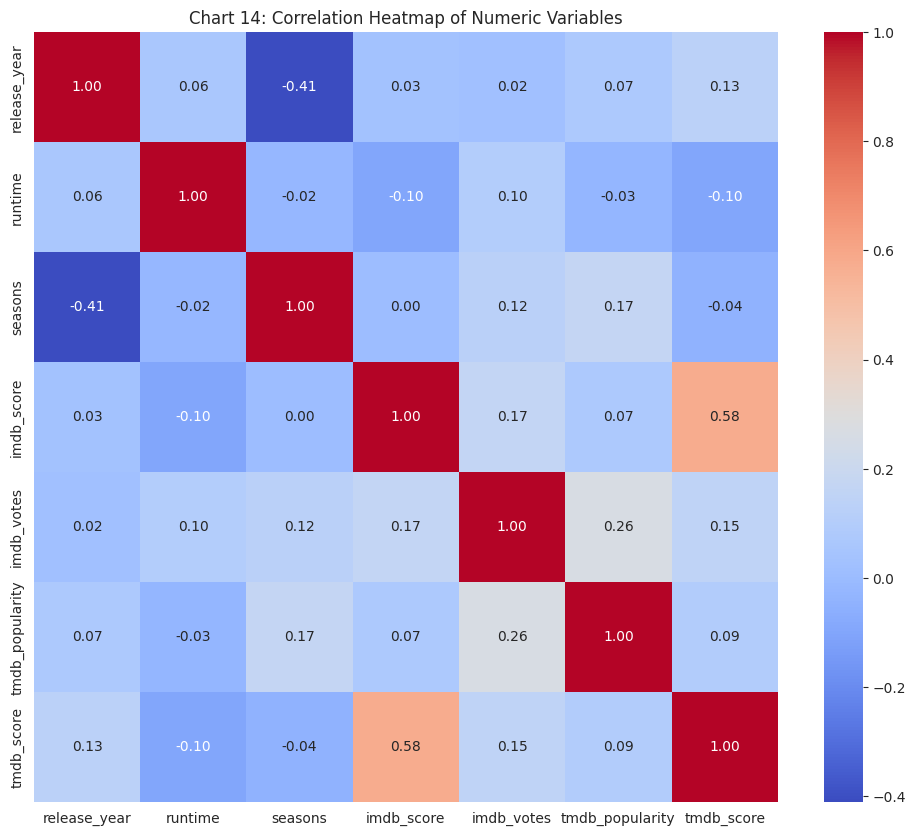

In [61]:
# Correlation Heatmap visualization code
numeric_cols = titles_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Chart 14: Correlation Heatmap of Numeric Variables')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps effectively display correlations between variables.

##### 2. What is/are the insight(s) found from the chart?

Strong correlations help identify redundant or interrelated features.

#### Chart - 15 - Pair Plot

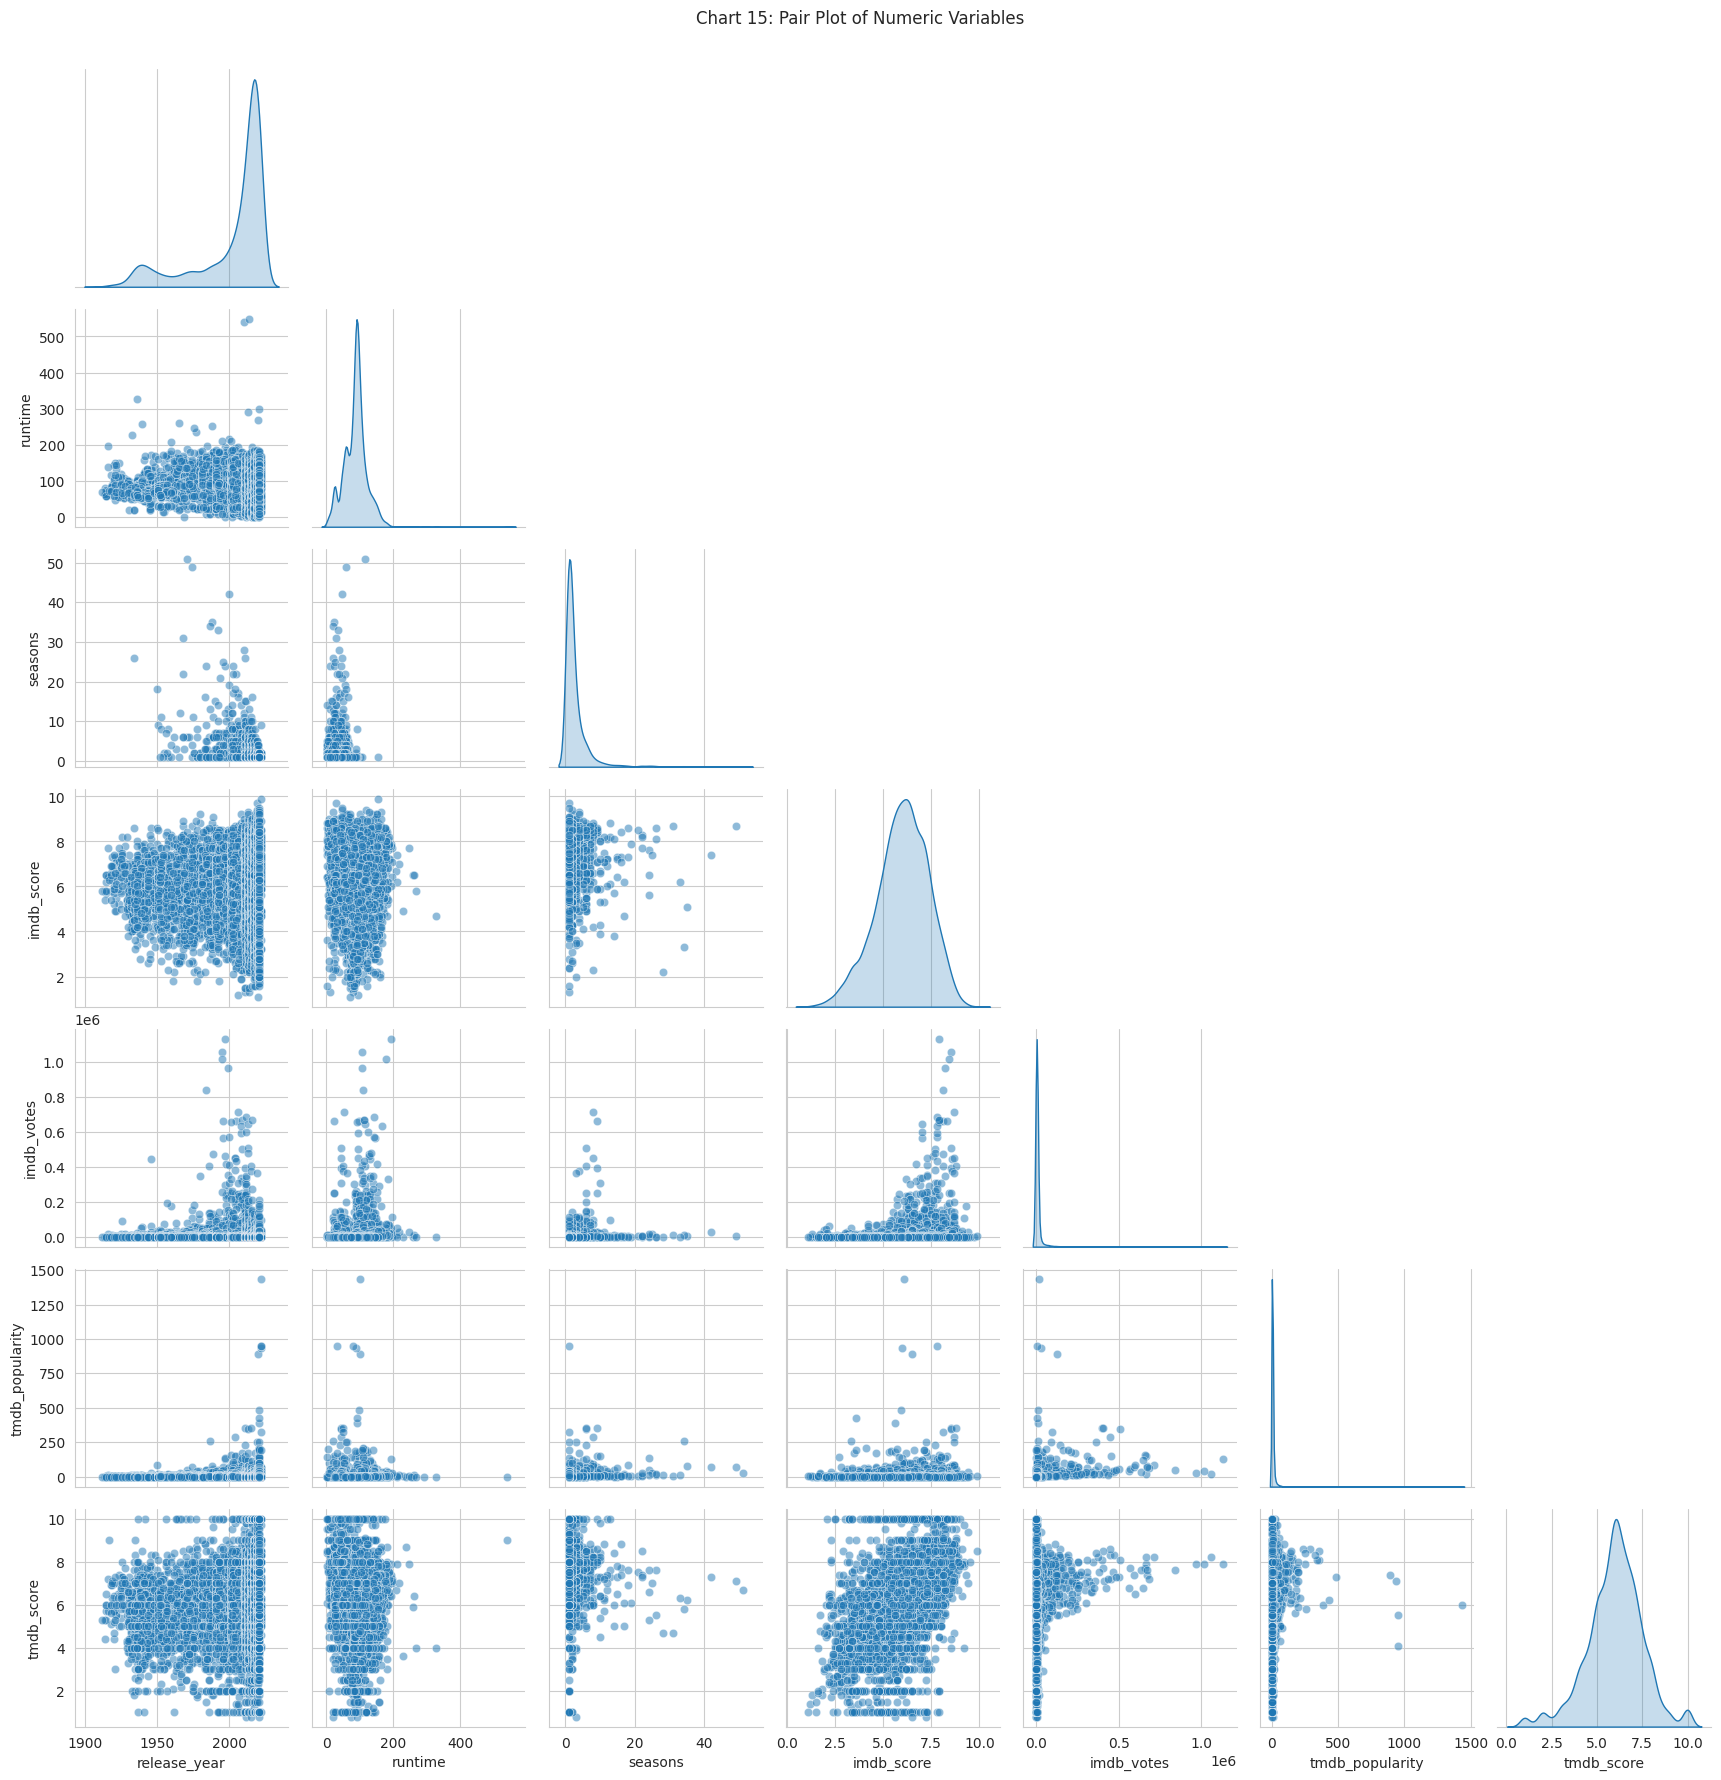

In [62]:
# Pair Plot visualization code
sns.pairplot(numeric_cols, diag_kind='kde', corner=True, plot_kws={'alpha':0.5})
plt.suptitle('Chart 15: Pair Plot of Numeric Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots display pairwise relationships along with individual distributions.

##### 2. What is/are the insight(s) found from the chart?

Useful for spotting non-linear relationships and clusters.

#### Chart - 16

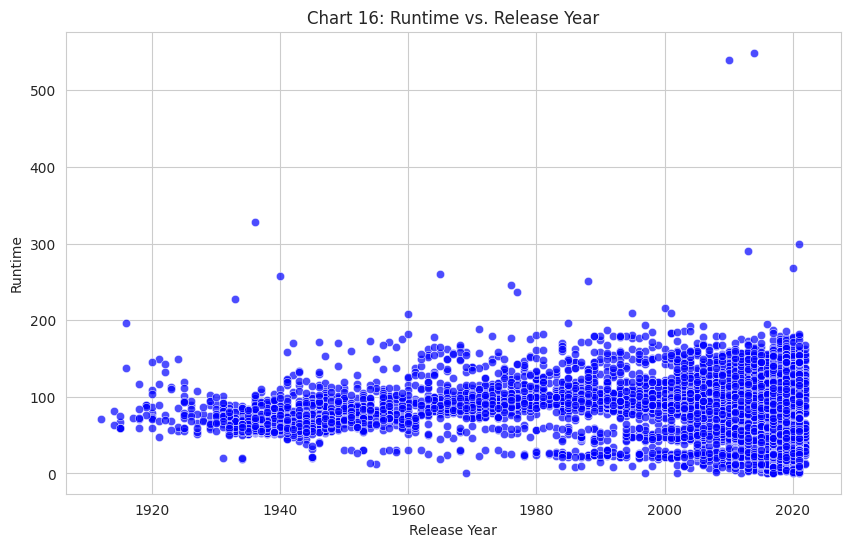

In [65]:
# Chart - 16 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titles_df, x='release_year', y='runtime', alpha=0.7, color='blue')
plt.title('Chart 16: Runtime vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots reveal trends over time.

##### 2. What is/are the insight(s) found from the chart?

Identifies any patterns in runtime changes over the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Significant shifts in runtime may signal evolving content production practices.

#### Chart - 17

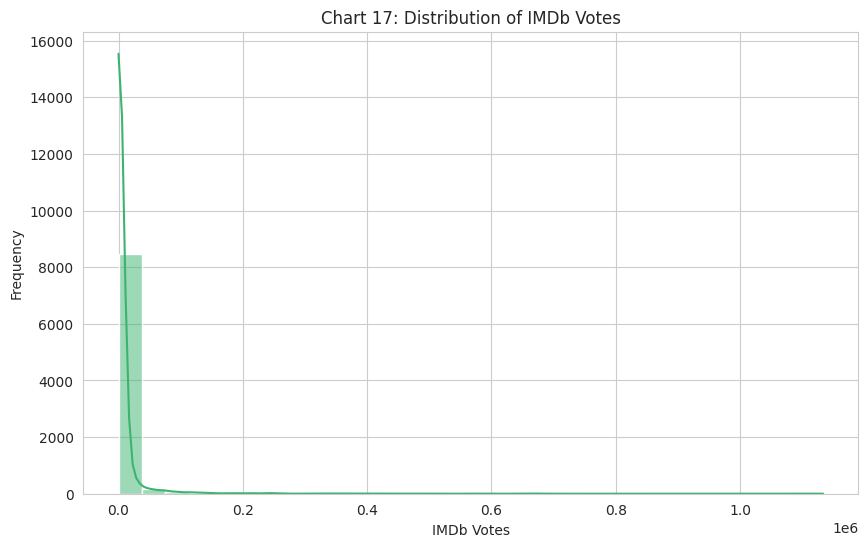

In [66]:
# Chart - 17 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(titles_df['imdb_votes'].dropna(), bins=30, kde=True, color='mediumseagreen')
plt.title('Chart 17: Distribution of IMDb Votes')
plt.xlabel('IMDb Votes')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms reveal the distribution of user engagement metrics.

##### 2. What is/are the insight(s) found from the chart?

A highly skewed distribution suggests that only a few titles get many votes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Low engagement across most titles can indicate potential negative growth in audience interest.

#### Chart - 18

<ipython-input-67-b2bf4d8fdb3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_runtime_per_genre.values, y=avg_runtime_per_genre.index, palette='Blues_d')


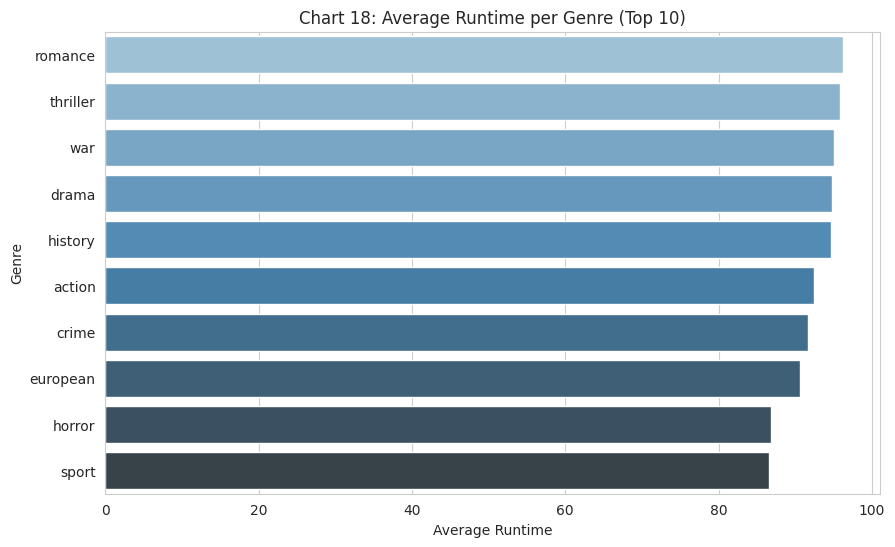

In [67]:
# Chart - 18 visualization code
avg_runtime_per_genre = titles_exploded.groupby('genres_list')['runtime'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_runtime_per_genre.values, y=avg_runtime_per_genre.index, palette='Blues_d')
plt.title('Chart 18: Average Runtime per Genre (Top 10)')
plt.xlabel('Average Runtime')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts compare average values across categories.

##### 2. What is/are the insight(s) found from the chart?

Identifies genres that tend to have longer or shorter content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If a genre with long runtime also has poor ratings, it may be a signal for negative audience reception.

#### Chart - 19

<ipython-input-68-79ee64263e19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credits_df, x='role', palette='Accent')


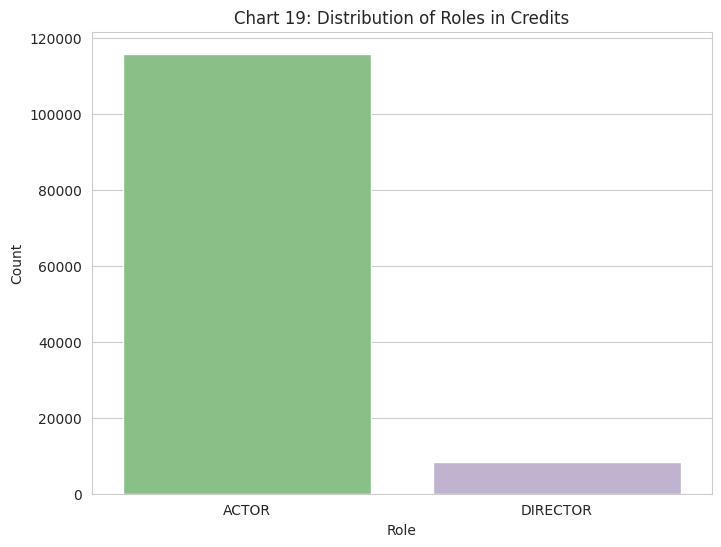

In [68]:
# Chart - 19 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=credits_df, x='role', palette='Accent')
plt.title('Chart 19: Distribution of Roles in Credits')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Count plots show categorical frequencies.

##### 2. What is/are the insight(s) found from the chart?

Reveals the distribution between actors and directors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

An imbalance may suggest a need to evaluate talent strategy.

#### Chart - 20

<ipython-input-69-3a4e51509036>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titles_df, y='tmdb_popularity', palette='cubehelix')


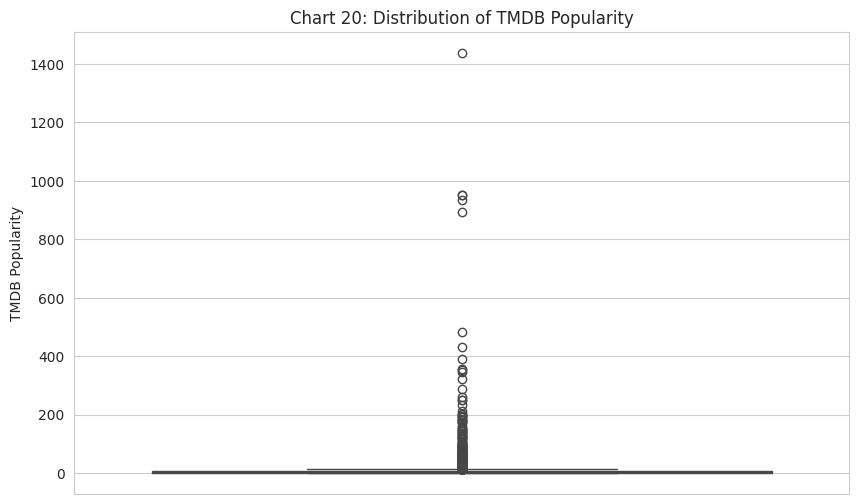

In [69]:
# Chart - 20 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=titles_df, y='tmdb_popularity', palette='cubehelix')
plt.title('Chart 20: Distribution of TMDB Popularity')
plt.ylabel('TMDB Popularity')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots compare the distribution of a numeric variable.

##### 2. What is/are the insight(s) found from the chart?

Shows the overall variation in TMDB popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers or high variability may flag areas for content improvement.

#### Chart - 21

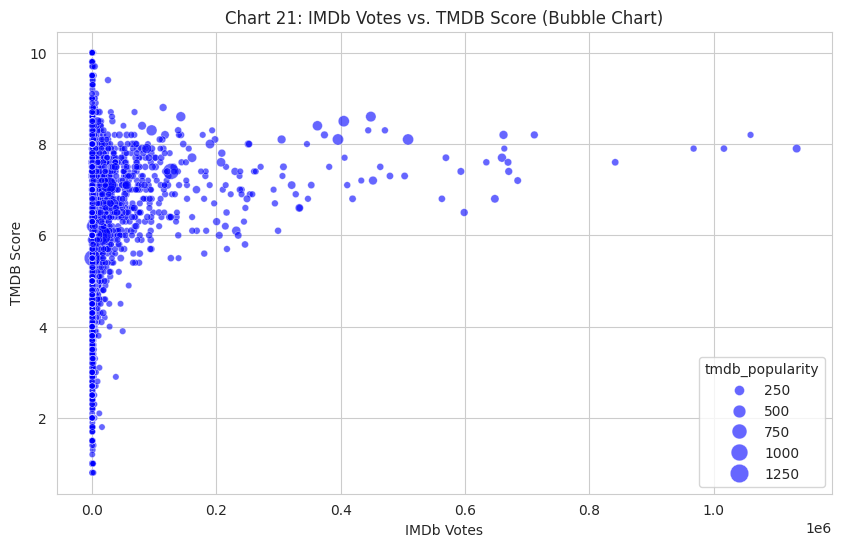

In [72]:
# Chart - 21 visualization code
sns.scatterplot(
    data=titles_df,
    x='imdb_votes',
    y='tmdb_score',
    size='tmdb_popularity',
    alpha=0.6,
    color='blue',
    sizes=(20, 200)
)
plt.title('Chart 21: IMDb Votes vs. TMDB Score (Bubble Chart)')
plt.xlabel('IMDb Votes')
plt.ylabel('TMDB Score')
plt.show()

##### 1. Why did you pick the specific chart?

Bubble charts add an extra dimension to standard scatter plots.

##### 2. What is/are the insight(s) found from the chart?

Illustrates how engagement (votes) relates to ratings across different popularity levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify segments with high engagement but low ratings that may require intervention.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective, it is recommended that the client invest in a robust data processing pipeline that consolidates and cleanses multiple data sources. This includes:

*   Removing duplicates and filling missing values (e.g., replacing missing age_certifications with 'NR' and imputing missing runtimes using median values grouped by content type).
*   Converting string representations of list-like columns (such as genres and production_countries) into Python list objects.
*   Engineering new features (such as the number of genres per title) that can provide deeper insights.
*   Merging Titles and Credits datasets to create a comprehensive view of the content and its associated cast/crew.

By implementing this approach, the client can leverage interactive visualizations and advanced analytics to identify trends, optimize content offerings, and drive improvements in marketing and production strategies.

# **Conclusion**

In conclusion, by addressing data quality issues and integrating key datasets, the project creates a solid foundation for data-driven decision-making. The enhanced dataset will enable the identification of emerging content trends, evaluation of performance metrics, and the discovery of actionable insights that can improve content curation and production strategies. Ultimately, this comprehensive analysis will help Amazon Prime better align its offerings with viewer preferences, foster higher engagement, and achieve sustained business growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***